In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:29<00:00, 99.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob as gb
import cv2 as cv

In [3]:
train = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'


In [4]:
size = 244
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 90,
    width_shift_range = 0.0,
    height_shift_range = 0.0,
    shear_range = 0.0,
    zoom_range = 0.0,
    horizontal_flip = True,
    rescale = 1./255,
    preprocessing_function = None,
    validation_split = 0.1
).flow_from_directory(
    train,
    target_size = (size, size),
    batch_size = 64,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'training',
    shuffle = True
)


Found 63282 images belonging to 38 classes.


In [5]:
train_generator.class_indices


{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

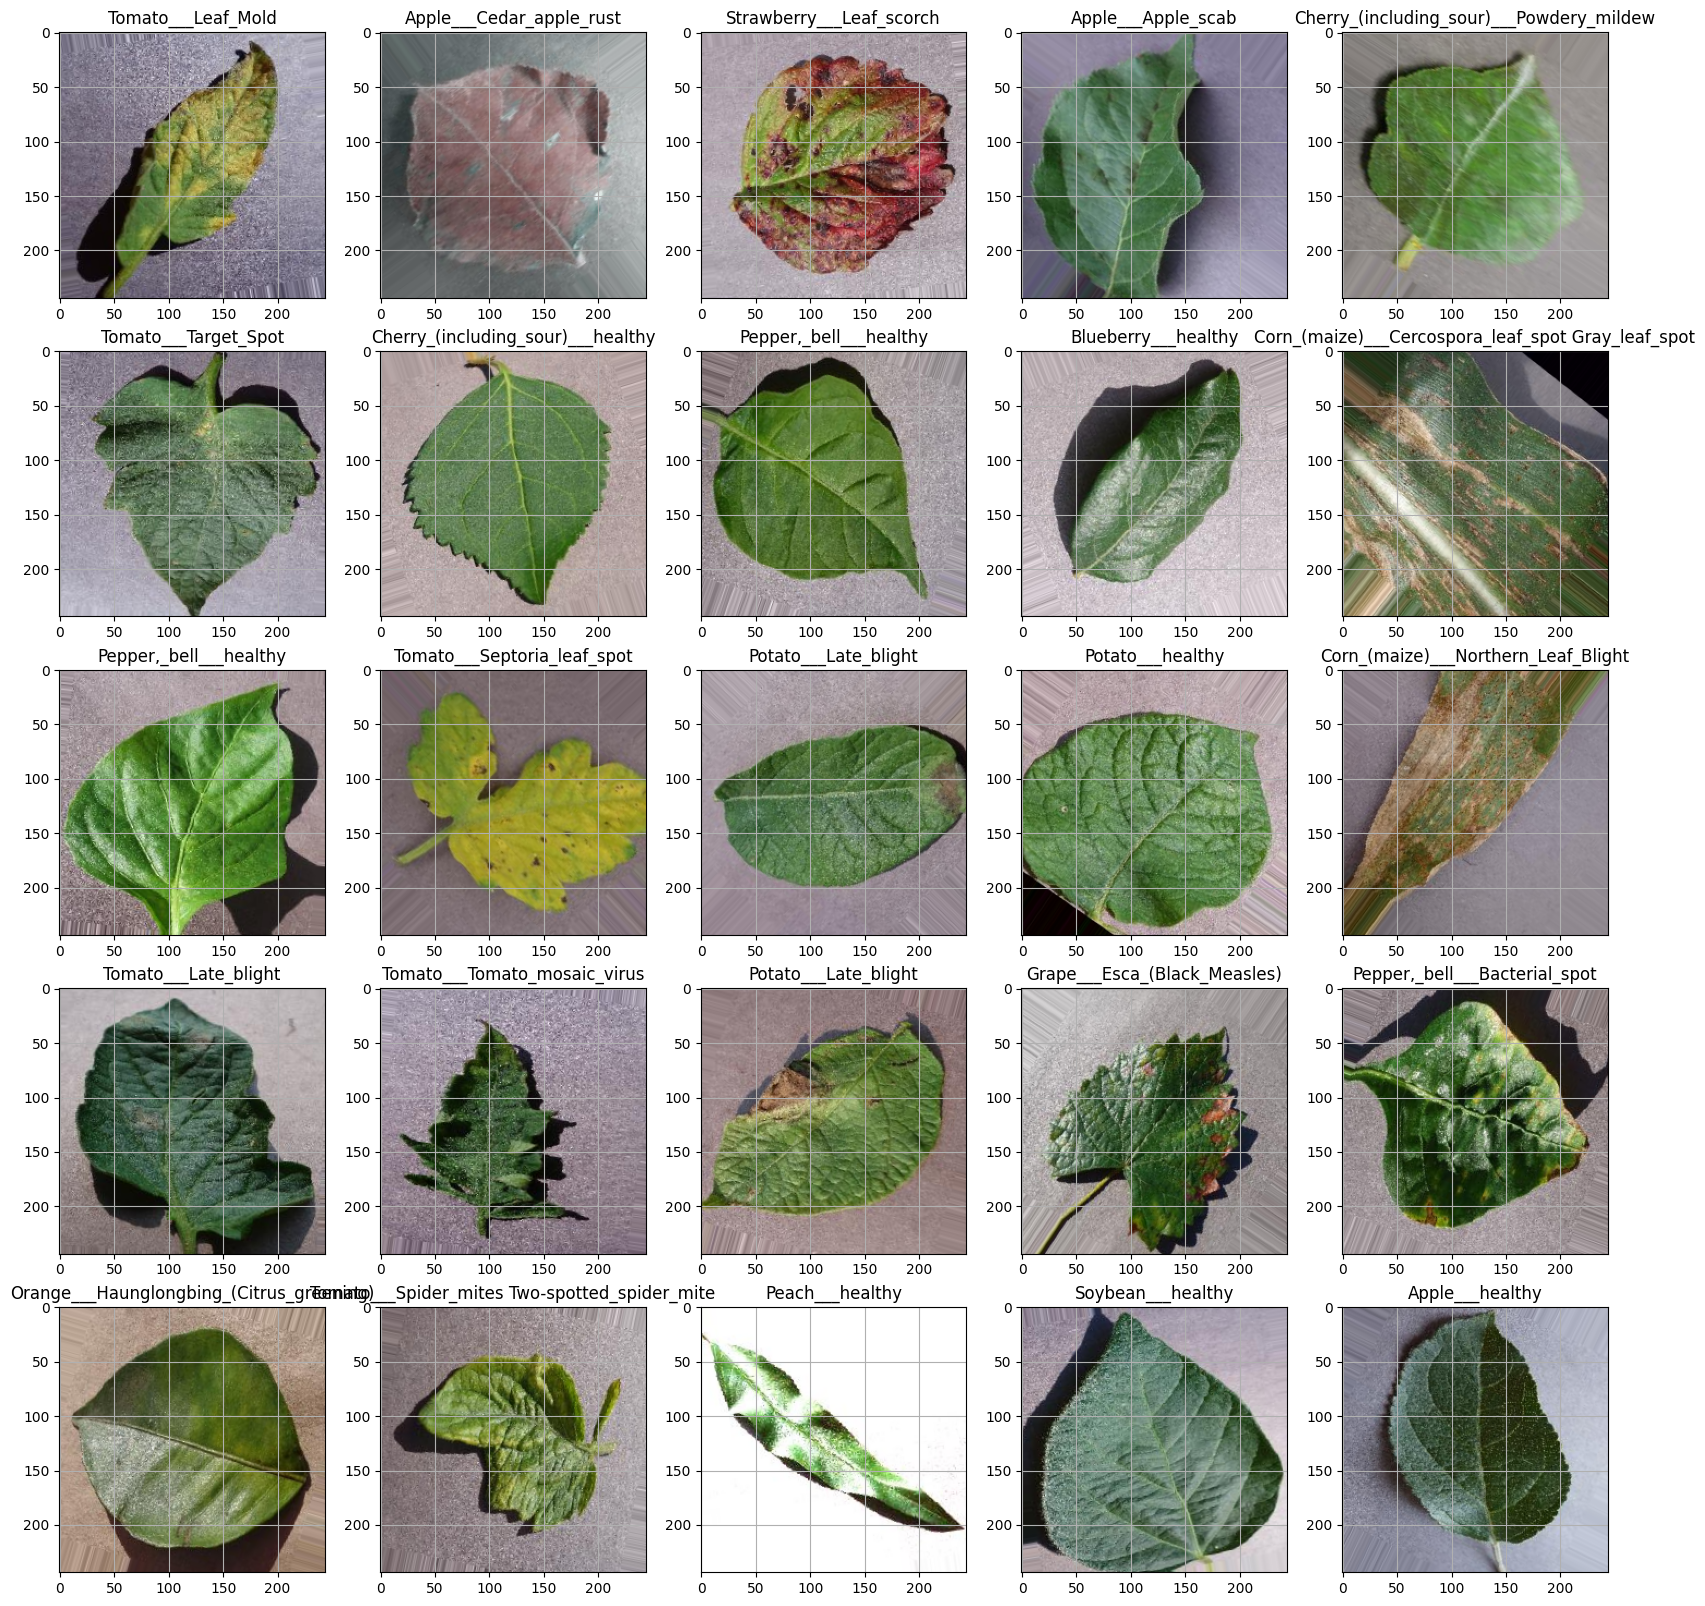

In [6]:
 #For Displaying the images
 classes = list(train_generator.class_indices.keys())
 plt.figure(figsize=(20,20))
 for X_batch, Y_batch in train_generator:
  for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_batch[i])
    plt.title(classes[np.where(Y_batch[i]==1)[0][0]])
    plt.grid(None)
  plt.show()
  break


In [7]:
valid = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'


In [8]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    preprocessing_function = None,
    validation_split = 0.1
).flow_from_directory(
    valid,
    target_size = (size,size),
    batch_size = 64,
    class_mode = 'categorical',
    color_mode = 'rgb',
    subset = 'validation',
    shuffle = False
    )


Found 1742 images belonging to 38 classes.


In [9]:
test = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    preprocessing_function = None,
).flow_from_directory(
    test,
    target_size = (244,244),
    batch_size = 64,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = False
)

Found 17572 images belonging to 38 classes.


In [10]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [11]:
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=7,strides=1,padding='same',activation='relu',name='Conv1',input_shape=(244,244,3)))
model.add(keras.layers.MaxPool2D(pool_size=2,name='Pool1'))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5,strides=1,padding='same',activation='relu',name='Conv2'))
model.add(keras.layers.MaxPool2D(pool_size=2,name='Pool2'))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3,strides=1,padding='same',activation='relu',name='Conv3'))
model.add(keras.layers.MaxPool2D(pool_size=2,name='Pool4'))

model.add(keras.layers.Flatten(name='Flatten1'))

model.add(keras.layers.Dense(128,activation='relu',name='Dense1'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64,activation='relu',name='Dense2'))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(38,activation='softmax',name='Output'))

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 244, 244, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 122, 122, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 122, 122, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 61, 61, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool4 (MaxPooling2D)                 │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │      29,491,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,705,766 (113.32 MB)

 Trainable params: 29,705,766 (113.32 MB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
early_stopping = EarlyStopping(monitor = 'var_loss',mode = 'max', patience = 15,restore_best_weights =True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor ='var_loss',save_best_only = True)
model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='var_loss',factor = 0.1,patience=15,min_lr=0.000001)
callbacks = [early_stopping,model_checkpoint,model_ReduceLROnPlateau]

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy','precision','recall'])

In [14]:
history = model.fit(train_generator,epochs=6,validation_data=valid_generator,callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
989/989 ━━━━━━━━━━━━━━━━━━━━ 987s 978ms/step - accuracy: 0.2937 - loss: 2.5398 - precision: 0.6903 - recall: 0.1591 - val_accuracy: 0.7158 - val_loss: 0.9050 - val_precision: 0.8220 - val_recall: 0.6228 - learning_rate: 0.0010
Epoch 2/6


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `var_loss` which is not available. Available metrics are: accuracy,loss,precision,recall,val_accuracy,val_loss,val_precision,val_recall
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with var_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `var_loss` which is not available. Available metrics are: accuracy,loss,precision,recall,val_accuracy,val_loss,val_precision,val_recall,learning_rate.
  callback.on_epoch_end(epoch, logs)


989/989 ━━━━━━━━━━━━━━━━━━━━ 918s 928ms/step - accuracy: 0.7399 - loss: 0.8367 - precision: 0.8297 - recall: 0.6602 - val_accuracy: 0.7698 - val_loss: 0.7106 - val_precision: 0.8382 - val_recall: 0.7285 - learning_rate: 0.0010
Epoch 3/6
989/989 ━━━━━━━━━━━━━━━━━━━━ 916s 926ms/step - accuracy: 0.8162 - loss: 0.5766 - precision: 0.8695 - recall: 0.7728 - val_accuracy: 0.8117 - val_loss: 0.5591 - val_precision: 0.8611 - val_recall: 0.7687 - learning_rate: 0.0010
Epoch 4/6
989/989 ━━━━━━━━━━━━━━━━━━━━ 919s 929ms/step - accuracy: 0.8622 - loss: 0.4337 - precision: 0.8945 - recall: 0.8344 - val_accuracy: 0.8307 - val_loss: 0.5058 - val_precision: 0.8656 - val_recall: 0.8020 - learning_rate: 0.0010
Epoch 5/6
989/989 ━━━━━━━━━━━━━━━━━━━━ 914s 924ms/step - accuracy: 0.8844 - loss: 0.3534 - precision: 0.9101 - recall: 0.8650 - val_accuracy: 0.8777 - val_loss: 0.3859 - val_precision: 0.8984 - val_recall: 0.8530 - learning_rate: 0.0010
Epoch 6/6
989/989 ━━━━━━━━━━━━━━━━━━━━ 914s 925ms/step - accur

In [15]:
import seaborn as sns

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

precesion = history.history['precision']
val_precesion = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

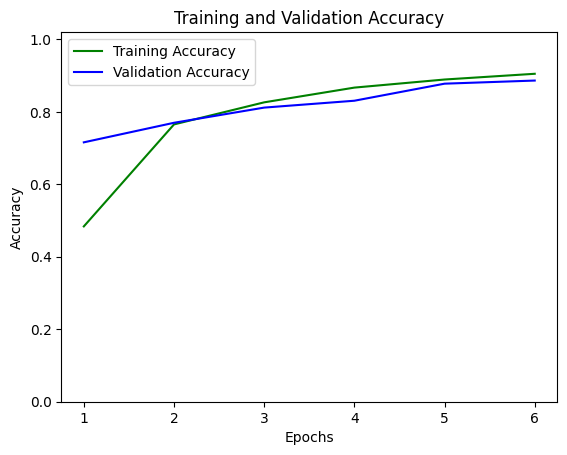

In [16]:
plt.plot(epochs,accuracy,color='green',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1.02)
plt.show()

In [17]:
model_evaluate = model.evaluate(test_generator)
print("loss:",model_evaluate[0])
print("accuracy:",model_evaluate[1])
print("precision:",model_evaluate[2])
print("recall:",model_evaluate[3])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


275/275 ━━━━━━━━━━━━━━━━━━━━ 46s 166ms/step - accuracy: 0.9073 - loss: 0.2912 - precision: 0.9215 - recall: 0.8941
loss: 0.3051372170448303
accuracy: 0.90166175365448
precision: 0.9179487228393555
recall: 0.8862394690513611


In [18]:
model.save('plant_diseses_model.keras')